In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

C:\Users\dolin\AppData\Local\Temp\ipykernel_33260\4287691399.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Preprocessing

In [2]:
data = pd.read_csv("seattle-weather.csv")

In [3]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

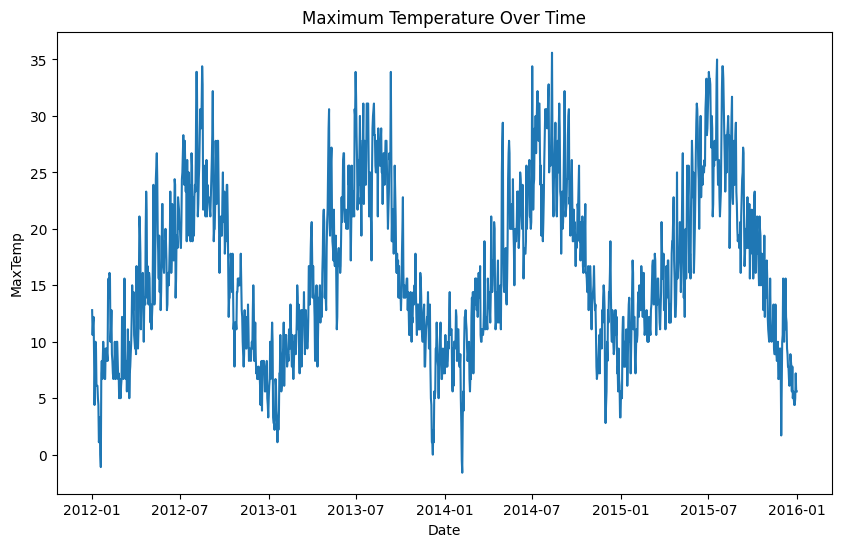

In [6]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.savefig('maxtemp.png')
plt.show()

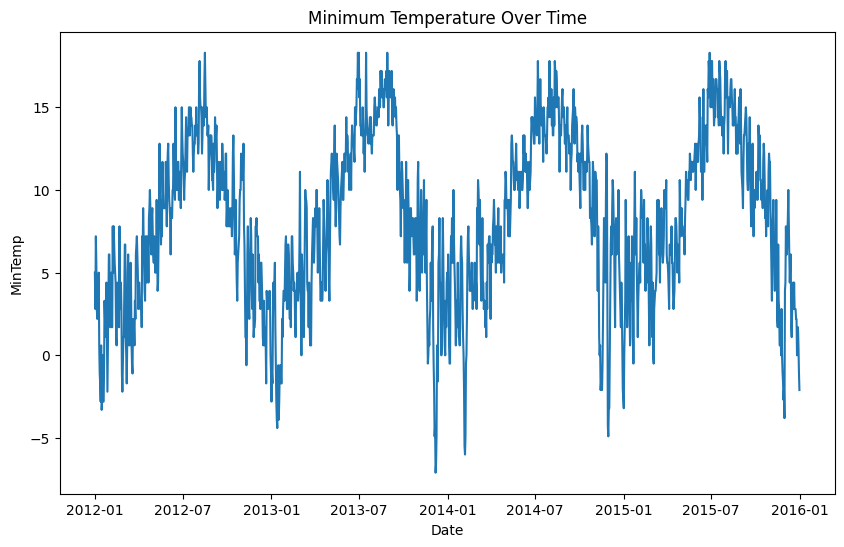

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_min'])
plt.title('Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.savefig('mintemp.png')
plt.show()

In [8]:
data['date_code'] = range(1, len(data) + 1)
data

,date,precipitation,temp_max,temp_min,wind,weather,date_code
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1457
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1458
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1459
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,1460


In [9]:
date = data['date_code']
mintemp = data['temp_min']
maxtemp = data['temp_max']

## Periodic model on entire data

In [10]:
a = 2*np.pi/len(data)
def periodic_model(t, c1, c2, c3, c4, c5, c6, c7):
    fit = c1 + c2*np.cos(a*t) + c3*np.cos(2*a*t) + c4*np.cos(4*a*t) + c5*np.cos(6*a*t) + c6*np.cos(8*a*t) + c7*np.cos(10*a*t)
    return fit

In [11]:
popt, _ = curve_fit(periodic_model, date, mintemp)

popt

array([ 8.2347707 , -0.35348532, -0.42920037, -5.39323589, -0.0508579 ,
       -0.10856173,  0.10548748])

In [12]:
c1, c2, c3, c4, c5, c6, c7 = popt
y_pred = periodic_model(np.linspace(0,len(date),num=len(date)), *popt)

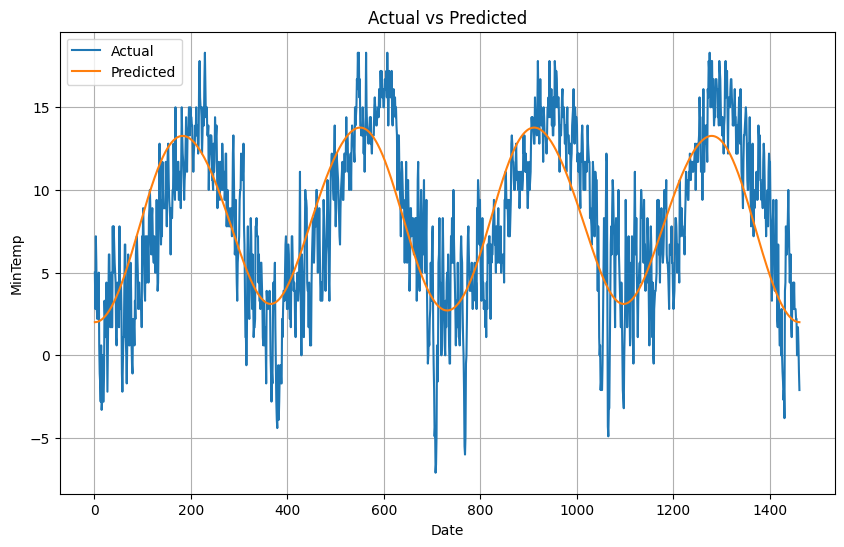

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(date, mintemp, label='Actual')
plt.plot(date, y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.savefig('entire_data.png')
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(mintemp, y_pred))
rmse

3.222613448503364

## Interpolating data per year

In [15]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,5,1,2012
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1457,27,12,2015
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1458,28,12,2015
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1459,29,12,2015
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,1460,30,12,2015


In [16]:
y1 = data[data["year"] < 2013]
y1

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,5,1,2012
...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,4.1,7.8,3.3,3.2,rain,362,27,12,2012
362,2012-12-28,0.0,8.3,3.9,1.7,rain,363,28,12,2012
363,2012-12-29,1.5,5.0,3.3,1.7,rain,364,29,12,2012
364,2012-12-30,0.0,4.4,0.0,1.8,drizzle,365,30,12,2012


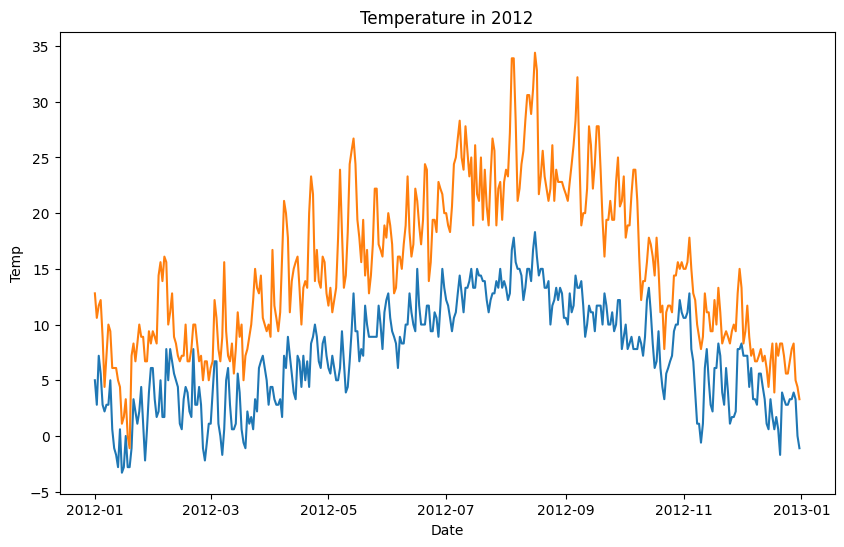

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y1['date'], y1['temp_min'], label='TempMin')
plt.plot(y1['date'], y1['temp_max'], label='TempMax')
plt.title('Temperature in 2012')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.savefig('temp2012.png')
plt.show()

In [18]:
def cos_model(t, c1, c2, c3, c4):
    fit = c1 + c2*np.cos(c3 + c4*t)
    return fit
popt, _ = curve_fit(cos_model, y1['date_code'], y1['temp_min'])

popt

array([ 7.289848  ,  0.13421592, -0.69729317,  1.01085649])

In [19]:
c1, c2, c3, c4 = popt
y1_pred = cos_model(y1['date_code'], *popt)

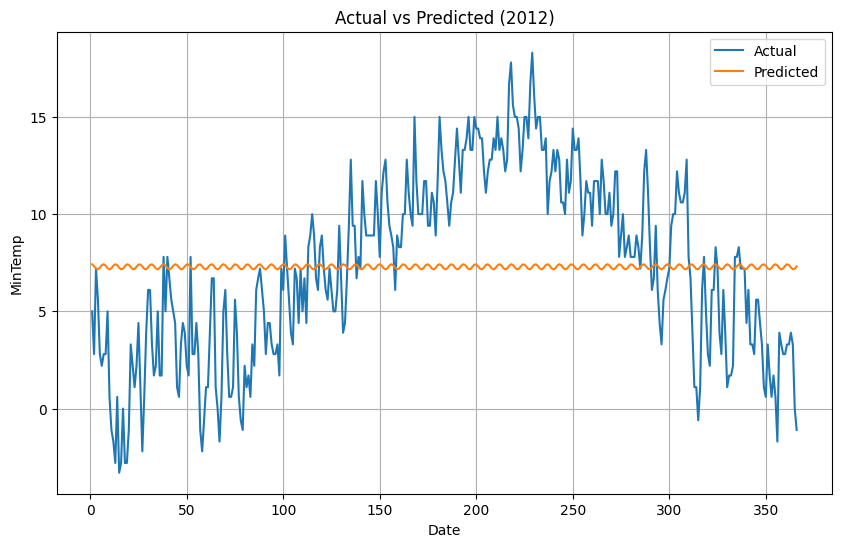

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y1['date_code'], y1['temp_min'], label='Actual')
plt.plot(y1['date_code'], y1_pred, label='Predicted')
plt.title('Actual vs Predicted (2012)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.savefig('org_model.png')
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(y1['temp_min'], y1_pred))
rmse

4.690062481162516

In [22]:
y1['date_mod'] = y1['date_code']/366
y1

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year,date_mod
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,1,2012,0.002732
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2,1,2012,0.005464
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,3,1,2012,0.008197
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,4,1,2012,0.010929
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,5,1,2012,0.013661
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,4.1,7.8,3.3,3.2,rain,362,27,12,2012,0.989071
362,2012-12-28,0.0,8.3,3.9,1.7,rain,363,28,12,2012,0.991803
363,2012-12-29,1.5,5.0,3.3,1.7,rain,364,29,12,2012,0.994536
364,2012-12-30,0.0,4.4,0.0,1.8,drizzle,365,30,12,2012,0.997268


### Min temp (2012)

In [23]:
popt, _ = curve_fit(cos_model, y1['date_mod'], y1['temp_min'])

popt

array([ 7.50822277,  5.73474765,  3.85094057, -6.57887766])

In [24]:
c1, c2, c3, c4 = popt
y1_min = cos_model(y1['date_mod'], *popt)

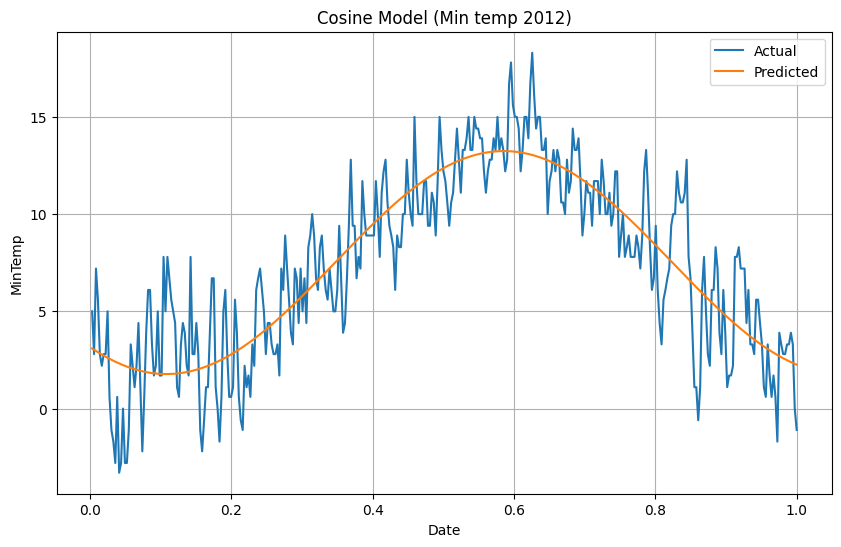

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y1['date_mod'], y1['temp_min'], label='Actual')
plt.plot(y1['date_mod'], y1_min, label='Predicted')
plt.title('Cosine Model (Min temp 2012)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.savefig('cos2012.png')
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(y1['temp_min'], y1_min))
rmse

2.2984085025440923

In [27]:
data['date_mod'] = data['date_code']/365
data

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year,date_mod
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,1,2012,0.002740
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2,1,2012,0.005479
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,3,1,2012,0.008219
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,4,1,2012,0.010959
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,5,1,2012,0.013699
...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1457,27,12,2015,3.991781
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1458,28,12,2015,3.994521
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1459,29,12,2015,3.997260
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,1460,30,12,2015,4.000000


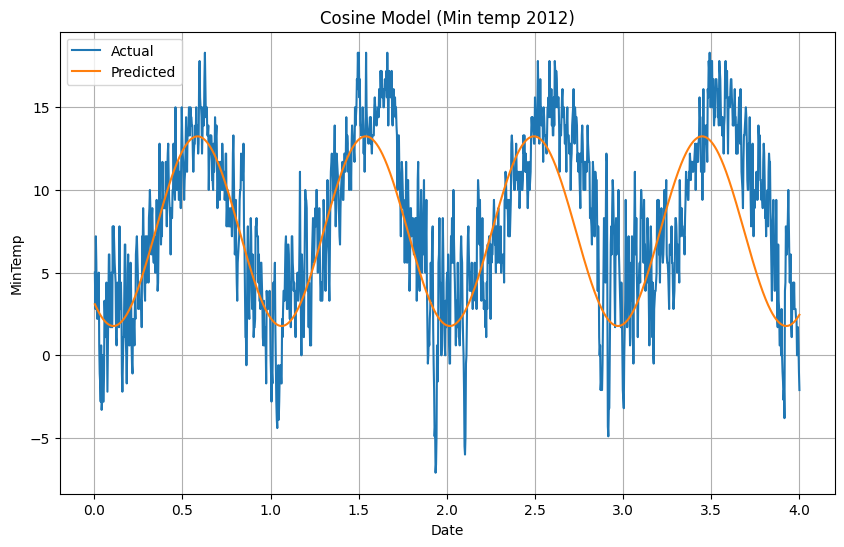

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_min'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Min temp 2012)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
rmse = np.sqrt(mean_squared_error(data['temp_min'], cos_model(data['date_mod'], *popt)))
rmse

3.3900658543877413

### Min temp (2013)

In [30]:
y2 = data[data["year"] == 2013]
y2['date_code'] = range(1, len(y2) + 1)
y2['date_mod'] = y2['date_code']/365
y2

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year,date_mod
366,2013-01-01,0.0,5.0,-2.8,2.7,sun,1,1,1,2013,0.002740
367,2013-01-02,0.0,6.1,-1.1,3.2,sun,2,2,1,2013,0.005479
368,2013-01-03,4.1,6.7,-1.7,3.0,rain,3,3,1,2013,0.008219
369,2013-01-04,2.5,10.0,2.2,2.8,rain,4,4,1,2013,0.010959
370,2013-01-05,3.0,6.7,4.4,3.1,rain,5,5,1,2013,0.013699
...,...,...,...,...,...,...,...,...,...,...,...
726,2013-12-27,0.3,8.9,0.0,2.1,rain,361,27,12,2013,0.989041
727,2013-12-28,0.0,9.4,3.3,1.3,sun,362,28,12,2013,0.991781
728,2013-12-29,0.0,7.2,1.7,1.1,sun,363,29,12,2013,0.994521
729,2013-12-30,0.3,8.9,4.4,2.6,rain,364,30,12,2013,0.997260


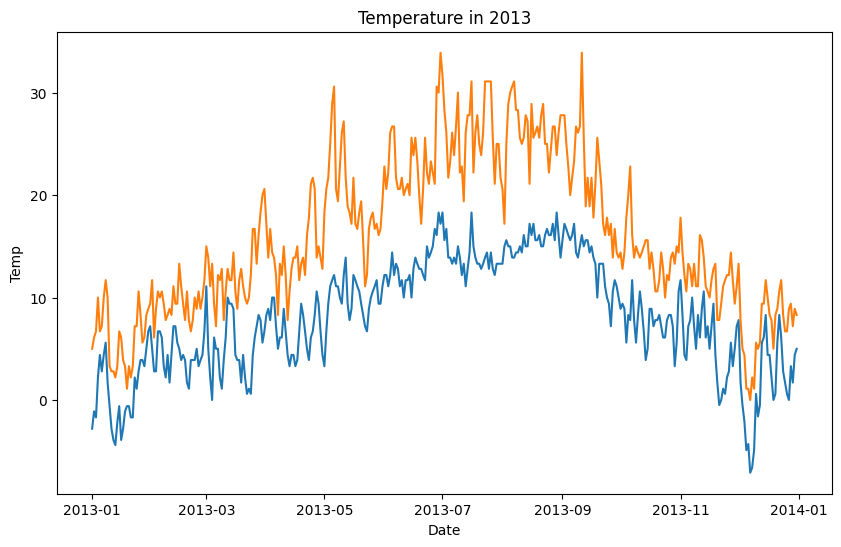

In [31]:
plt.figure(figsize=(10,6))
plt.plot(y2['date'], y2['temp_min'], label='TempMin')
plt.plot(y2['date'], y2['temp_max'], label='TempMax')
plt.title('Temperature in 2013')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [32]:
popt, _ = curve_fit(cos_model, y2['date_mod'], y2['temp_min'])
c1, c2, c3, c4 = popt
popt

array([ 8.19400656,  6.60691809,  3.52539001, -6.32405134])

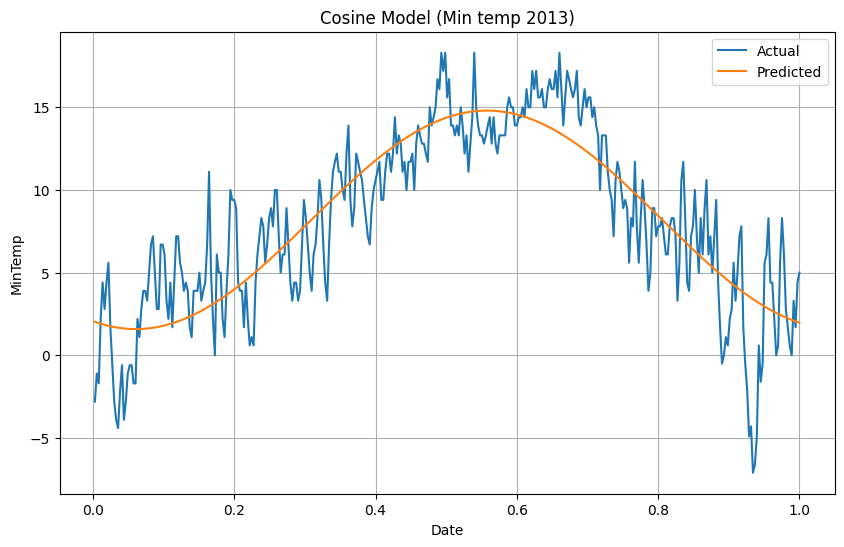

In [33]:
y2_min = cos_model(y2['date_mod'], *popt)
plt.figure(figsize=(10, 6))
plt.plot(y2['date_mod'], y2['temp_min'], label='Actual')
plt.plot(y2['date_mod'], y2_min, label='Predicted')
plt.title('Cosine Model (Min temp 2013)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
rmse = np.sqrt(mean_squared_error(y2['temp_min'], y2_min))
rmse

2.762412420655088

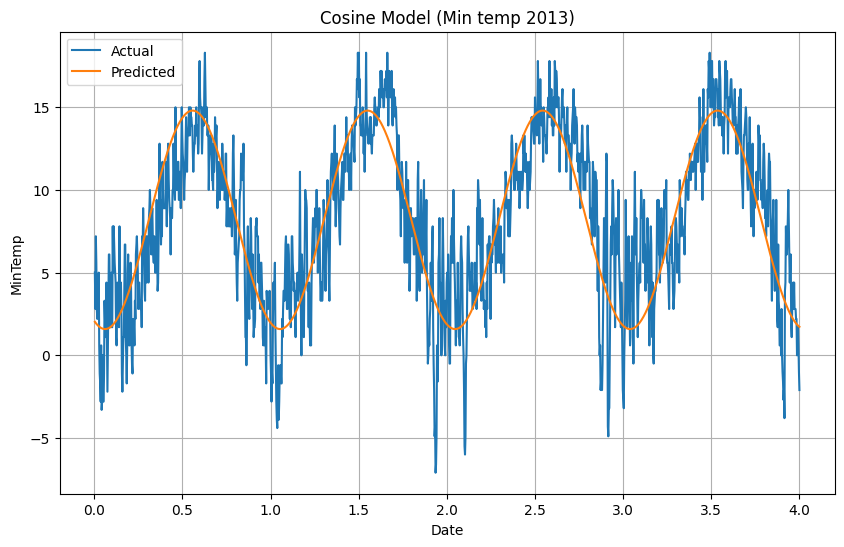

In [35]:
popt, _ = curve_fit(cos_model, y2['date_mod'], y2['temp_min'])
c1, c2, c3, c4 = popt
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_min'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Min temp 2013)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(data['temp_min'], cos_model(data['date_mod'], *popt)))
rmse

2.835601138202228

### Min temp (2014)

In [37]:
y3 = data[data["year"] == 2014]
y3['date_code'] = range(1, len(y3) + 1)
y3['date_mod'] = y3['date_code']/365
y3

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year,date_mod
731,2014-01-01,0.0,7.2,3.3,1.2,sun,1,1,1,2014,0.002740
732,2014-01-02,4.1,10.6,6.1,3.2,rain,2,2,1,2014,0.005479
733,2014-01-03,1.5,8.9,2.8,2.6,rain,3,3,1,2014,0.008219
734,2014-01-04,0.0,7.8,0.6,2.7,fog,4,4,1,2014,0.010959
735,2014-01-05,0.0,8.3,-0.5,3.7,sun,5,5,1,2014,0.013699
...,...,...,...,...,...,...,...,...,...,...,...
1091,2014-12-27,3.3,9.4,4.4,4.9,rain,361,27,12,2014,0.989041
1092,2014-12-28,4.1,6.7,2.8,1.8,rain,362,28,12,2014,0.991781
1093,2014-12-29,0.0,6.1,0.6,4.3,fog,363,29,12,2014,0.994521
1094,2014-12-30,0.0,3.3,-2.1,3.6,sun,364,30,12,2014,0.997260


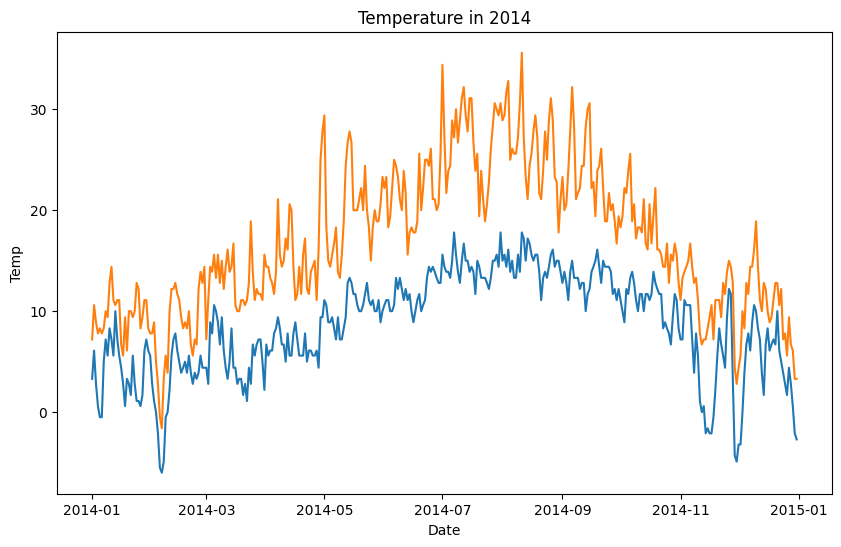

In [38]:
plt.figure(figsize=(10,6))
plt.plot(y3['date'], y3['temp_min'], label='TempMin')
plt.plot(y3['date'], y3['temp_max'], label='TempMax')
plt.title('Temperature in 2014')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [39]:
popt, _ = curve_fit(cos_model, y3['date_mod'], y3['temp_min'])
c1, c2, c3, c4 = popt
popt

array([ 8.9699997 ,  5.77149132,  3.88750265, -6.69957774])

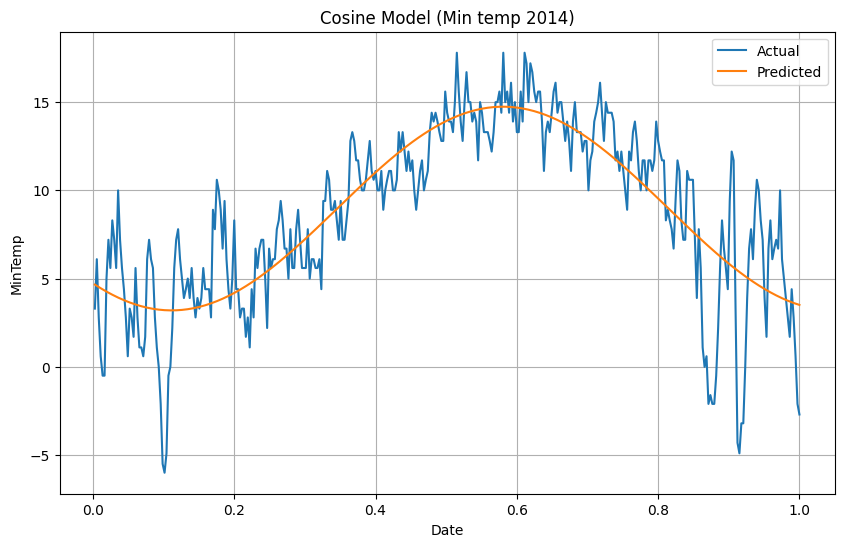

In [40]:
y3_min = cos_model(y3['date_mod'], *popt)
plt.figure(figsize=(10, 6))
plt.plot(y3['date_mod'], y3['temp_min'], label='Actual')
plt.plot(y3['date_mod'], y3_min, label='Predicted')
plt.title('Cosine Model (Min temp 2014)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
rmse = np.sqrt(mean_squared_error(y3['temp_min'], y3_min))
rmse

2.761276364400289

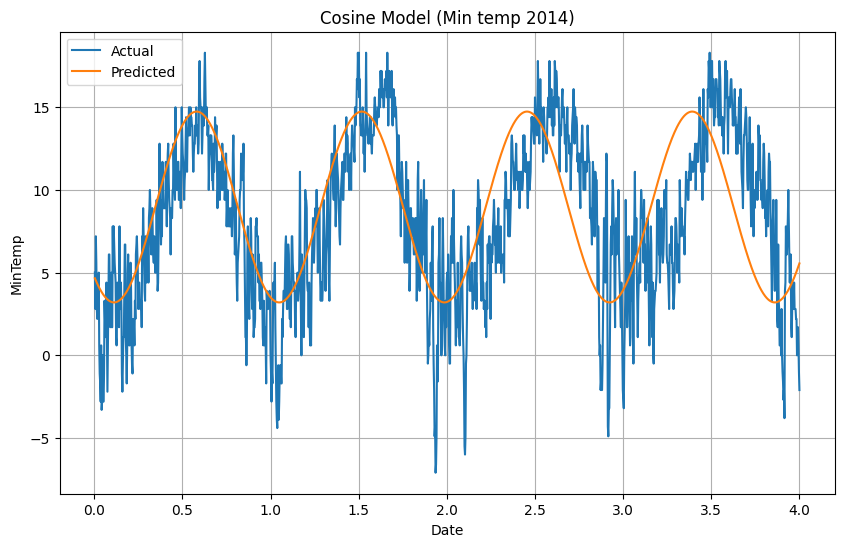

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_min'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Min temp 2014)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
rmse = np.sqrt(mean_squared_error(data['temp_min'], cos_model(data['date_mod'], *popt)))
rmse

3.841787024160479

### Min temp (2015)

In [44]:
y4 = data[data["year"] == 2015]
y4['date_code'] = range(1, len(y4) + 1)
y4['date_mod'] = y4['date_code']/365
y4

,date,precipitation,temp_max,temp_min,wind,weather,date_code,day,month,year,date_mod
1096,2015-01-01,0.0,5.6,-3.2,1.2,sun,1,1,1,2015,0.002740
1097,2015-01-02,1.5,5.6,0.0,2.3,rain,2,2,1,2015,0.005479
1098,2015-01-03,0.0,5.0,1.7,1.7,fog,3,3,1,2015,0.008219
1099,2015-01-04,10.2,10.6,3.3,4.5,rain,4,4,1,2015,0.010959
1100,2015-01-05,8.1,12.2,9.4,6.4,rain,5,5,1,2015,0.013699
...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,361,27,12,2015,0.989041
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,362,28,12,2015,0.991781
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,363,29,12,2015,0.994521
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,364,30,12,2015,0.997260


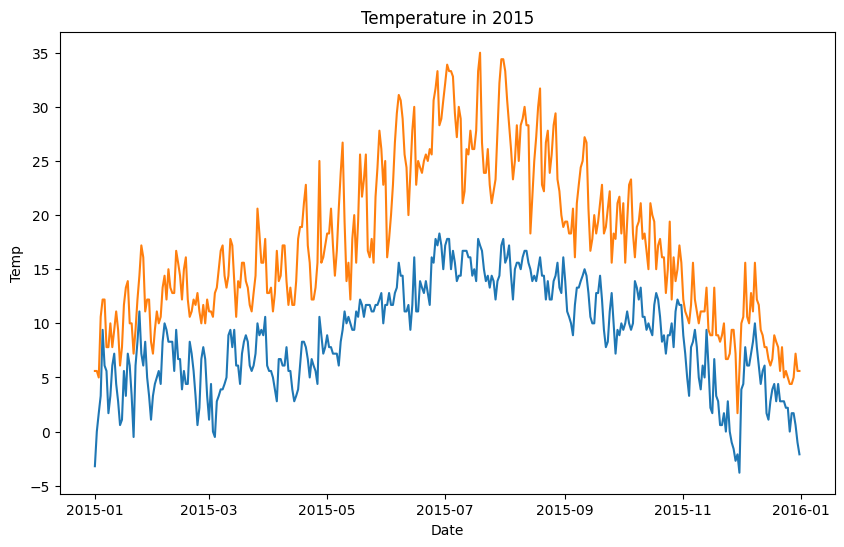

In [45]:
plt.figure(figsize=(10,6))
plt.plot(y4['date'], y4['temp_min'], label='TempMin')
plt.plot(y4['date'], y4['temp_max'], label='TempMax')
plt.title('Temperature in 2015')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [46]:
popt, _ = curve_fit(cos_model, y4['date_mod'], y4['temp_min'])
c1, c2, c3, c4 = popt
popt

array([ 9.49089796,  5.65957919,  4.05740185, -7.24042615])

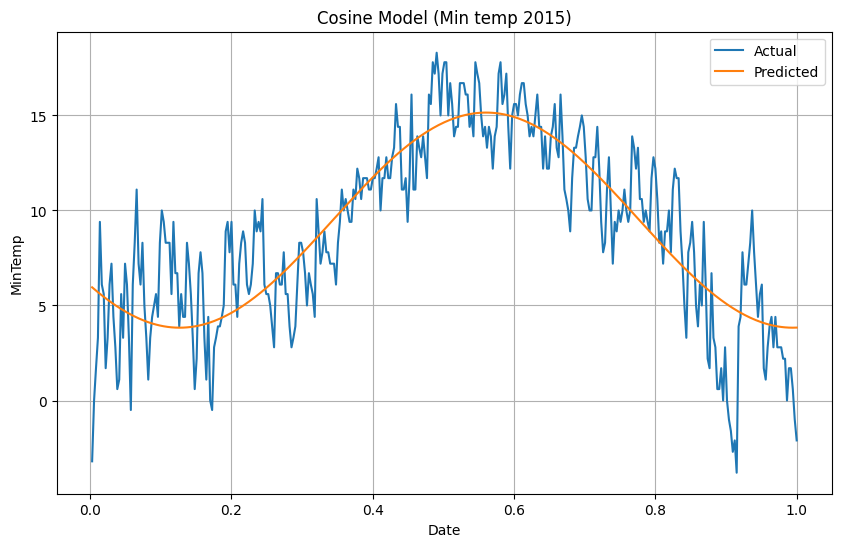

In [47]:
y4_min = cos_model(y4['date_mod'], *popt)
plt.figure(figsize=(10, 6))
plt.plot(y4['date_mod'], y4['temp_min'], label='Actual')
plt.plot(y4['date_mod'], y4_min, label='Predicted')
plt.title('Cosine Model (Min temp 2015)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
rmse = np.sqrt(mean_squared_error(y4['temp_min'], y4_min))
rmse

2.528895875599613

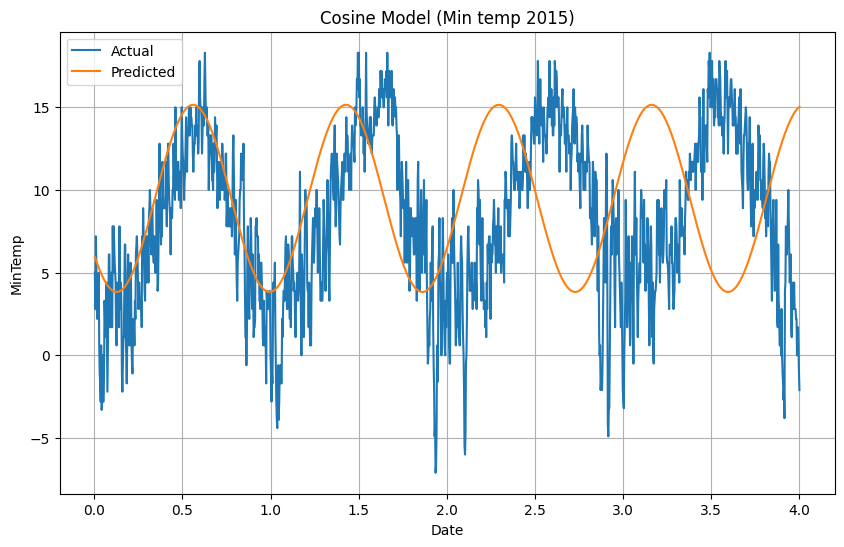

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_min'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Min temp 2015)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(data['temp_min'], cos_model(data['date_mod'], *popt)))
rmse

6.248447353150017

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


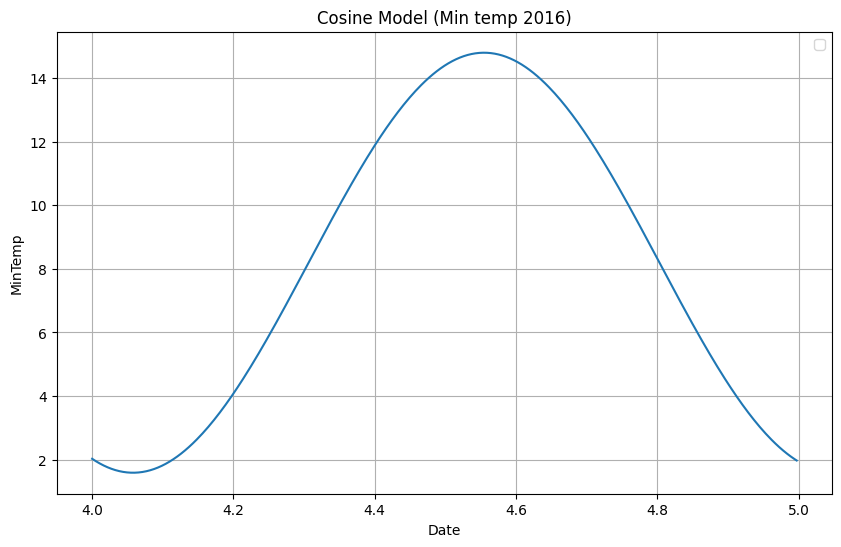

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(4, 5, 0.00274), y2_min)
plt.title('Cosine Model (Min temp 2016)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

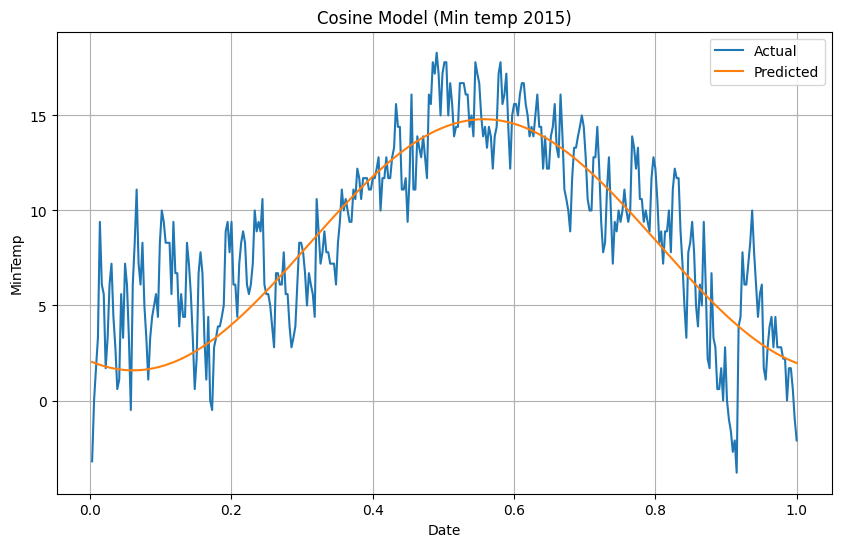

In [52]:
popt, _ = curve_fit(cos_model, y2['date_mod'], y2['temp_min'])
c1, c2, c3, c4 = popt
y2_min = cos_model(y2['date_mod'], *popt)
plt.figure(figsize=(10, 6))
plt.plot(y4['date_mod'], y4['temp_min'], label='Actual')
plt.plot(y4['date_mod'], y2_min, label='Predicted')
plt.title('Cosine Model (Min temp 2015)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(y4['temp_min'], y2_min))
rmse

2.7723458276782558

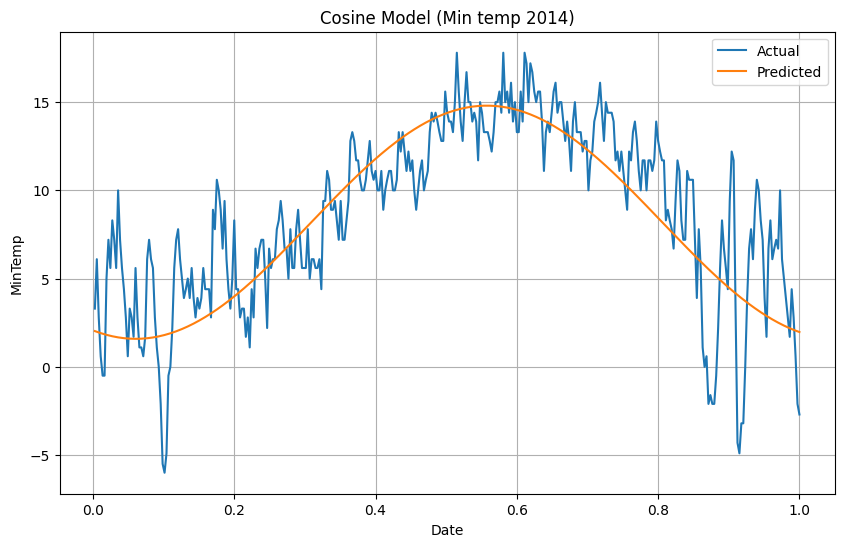

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(y3['date_mod'], y3['temp_min'], label='Actual')
plt.plot(y3['date_mod'], y2_min, label='Predicted')
plt.title('Cosine Model (Min temp 2014)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(y3['temp_min'], y2_min))
rmse

2.9458845416999426

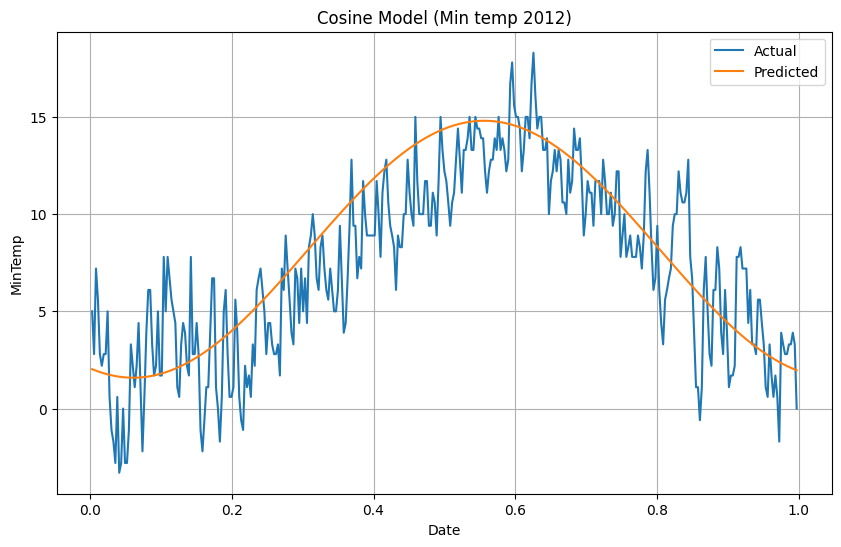

In [56]:
y1 = y1.drop(365)
plt.figure(figsize=(10, 6))
plt.plot(y1['date_mod'], y1['temp_min'], label='Actual')
plt.plot(y1['date_mod'], y2_min, label='Predicted')
plt.title('Cosine Model (Min temp 2012)')
plt.xlabel('Date')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
rmse = np.sqrt(mean_squared_error(y1['temp_min'], y2_min))
rmse

2.6580975036027725

### Max temp (2012)

In [58]:
popt, _ = curve_fit(cos_model, y1['date_mod'], y1['temp_max'])

popt

array([15.75379516,  8.52648155, -8.72286835, -6.69939324])

In [59]:
c1, c2, c3, c4 = popt
y1_max = cos_model(y1['date_mod'], *popt)

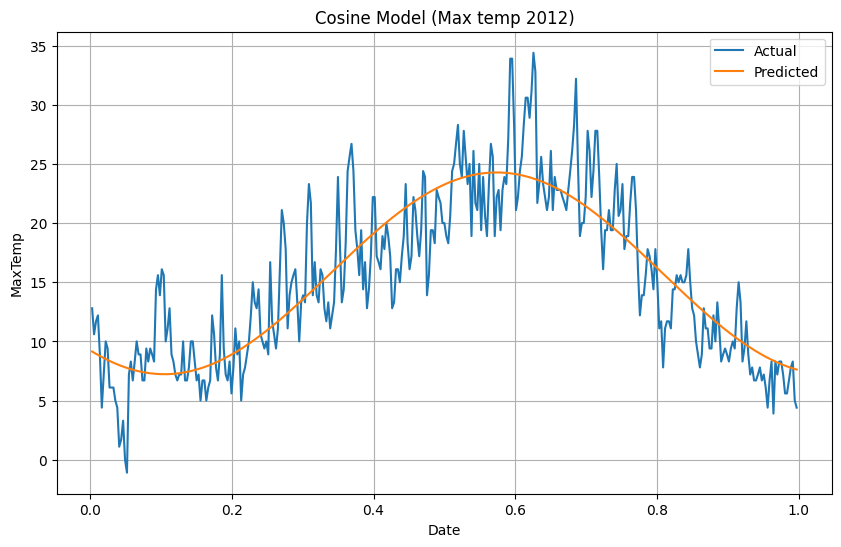

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(y1['date_mod'], y1['temp_max'], label='Actual')
plt.plot(y1['date_mod'], y1_max, label='Predicted')
plt.title('Cosine Model (Max temp 2012)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
rmse = np.sqrt(mean_squared_error(y1['temp_max'], y1_max))
rmse

3.5238936345525955

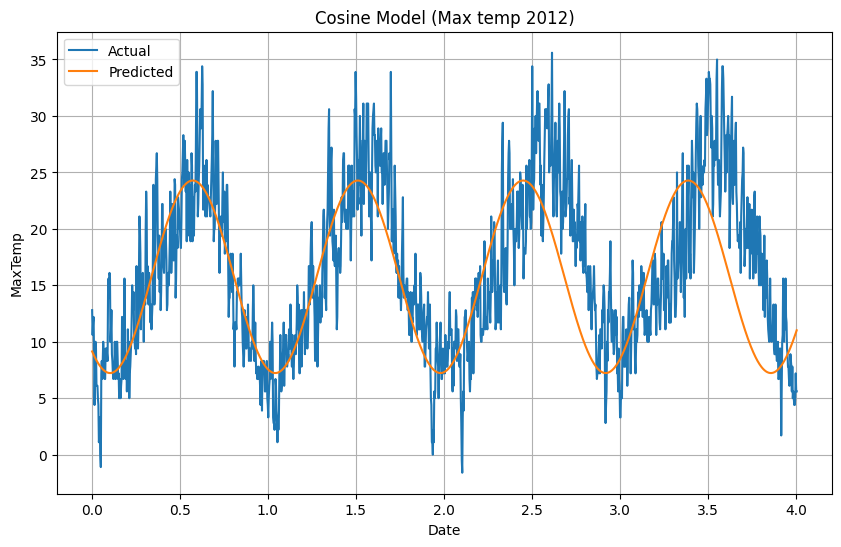

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_max'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Max temp 2012)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
rmse = np.sqrt(mean_squared_error(data['temp_min'], cos_model(data['date_mod'], *popt)))
rmse

8.505269282127149

### Max temp (2013)

In [64]:
popt, _ = curve_fit(cos_model, y2['date_mod'], y2['temp_max'])

popt

array([16.33337112,  9.36906958, -2.76767591, -6.48028796])

In [65]:
c1, c2, c3, c4 = popt
y2_max = cos_model(y2['date_mod'], *popt)

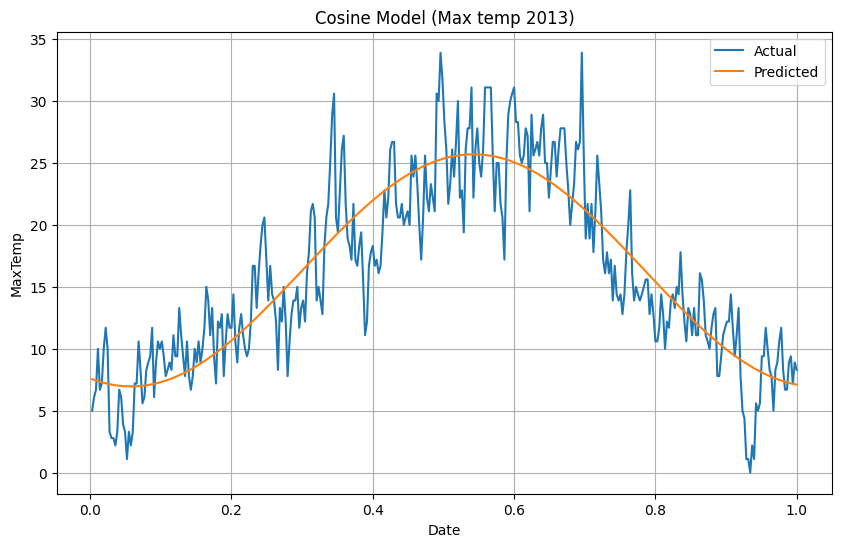

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(y2['date_mod'], y2['temp_max'], label='Actual')
plt.plot(y2['date_mod'], y2_max, label='Predicted')
plt.title('Cosine Model (Max temp 2013)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(y2['temp_max'], y2_max))
rmse

3.4726436770101046

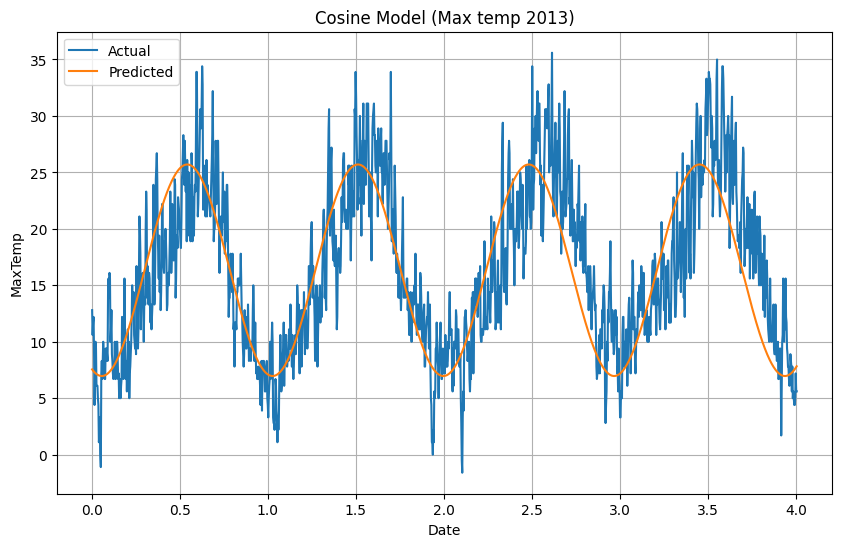

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_max'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Max temp 2013)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(data['temp_max'], cos_model(data['date_mod'], *popt)))
rmse

4.465022770061978

### Max temp (2014)

In [70]:
popt, _ = curve_fit(cos_model, y3['date_mod'], y3['temp_max'])

popt

array([17.49124643,  8.79727693, -2.52642758, -6.69538688])

In [71]:
c1, c2, c3, c4 = popt
y3_max = cos_model(y3['date_mod'], *popt)

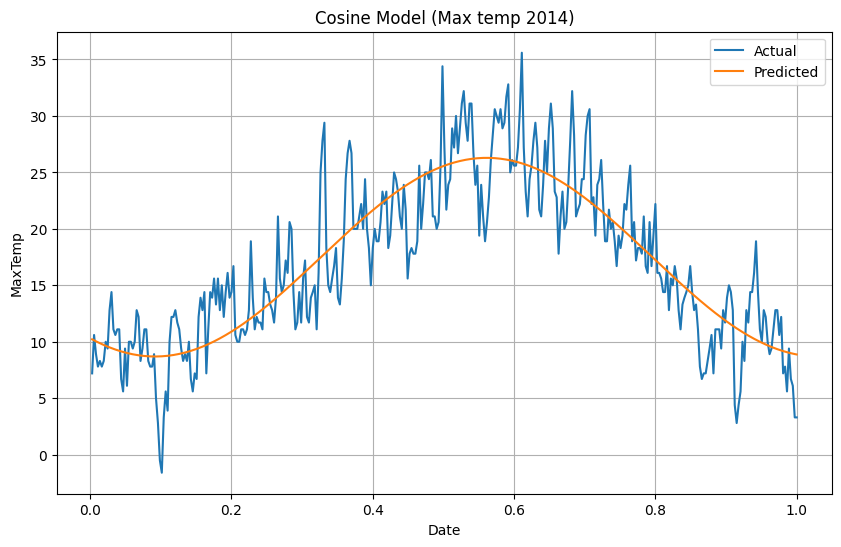

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(y3['date_mod'], y3['temp_max'], label='Actual')
plt.plot(y3['date_mod'], y3_max, label='Predicted')
plt.title('Cosine Model (Max temp 2014)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
rmse = np.sqrt(mean_squared_error(y3['temp_max'], y3_max))
rmse

3.55321173786433

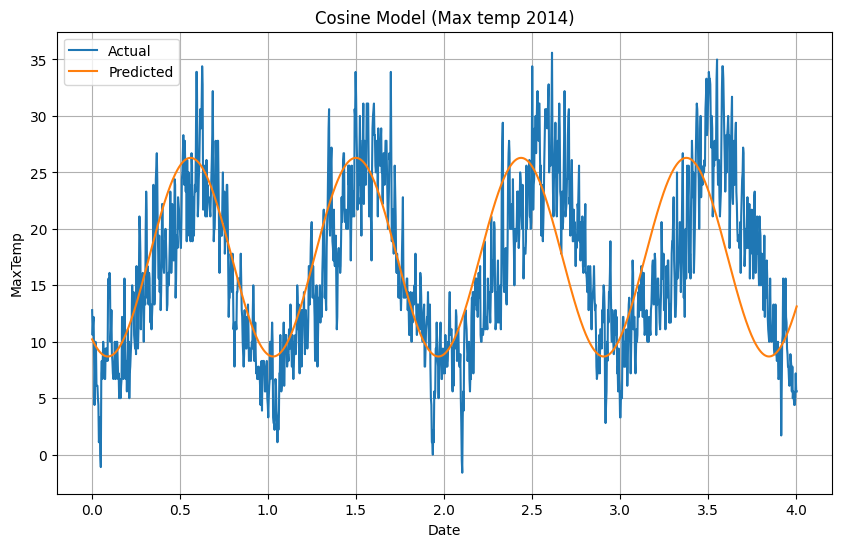

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_max'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Max temp 2014)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
rmse = np.sqrt(mean_squared_error(data['temp_max'], cos_model(data['date_mod'], *popt)))
rmse

5.481272911571637

### Max temp (2015)

In [76]:
popt, _ = curve_fit(cos_model, y4['date_mod'], y4['temp_max'])

popt

array([18.34243691,  8.8263542 , -2.50128207, -7.05565959])

In [77]:
c1, c2, c3, c4 = popt
y4_max = cos_model(y4['date_mod'], *popt)

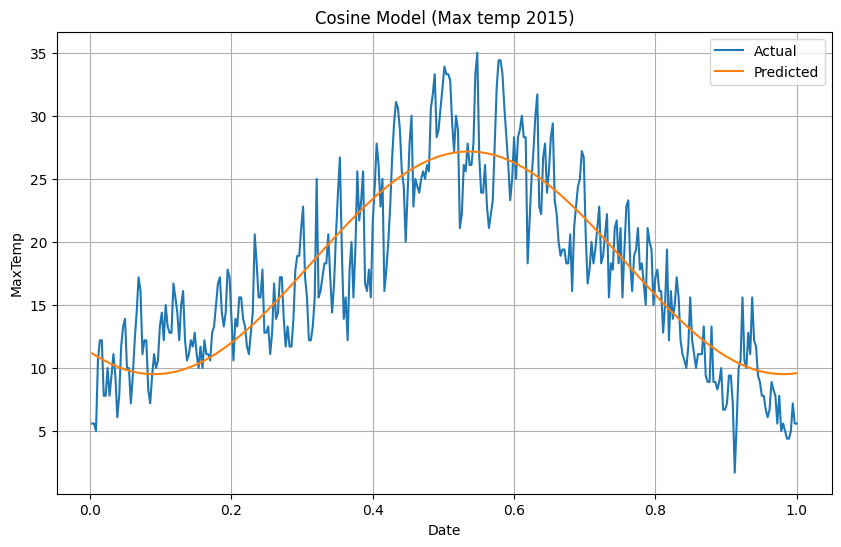

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(y4['date_mod'], y4['temp_max'], label='Actual')
plt.plot(y4['date_mod'], y4_max, label='Predicted')
plt.title('Cosine Model (Max temp 2015)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
rmse = np.sqrt(mean_squared_error(y4['temp_max'], y4_max))
rmse

3.45529404117358

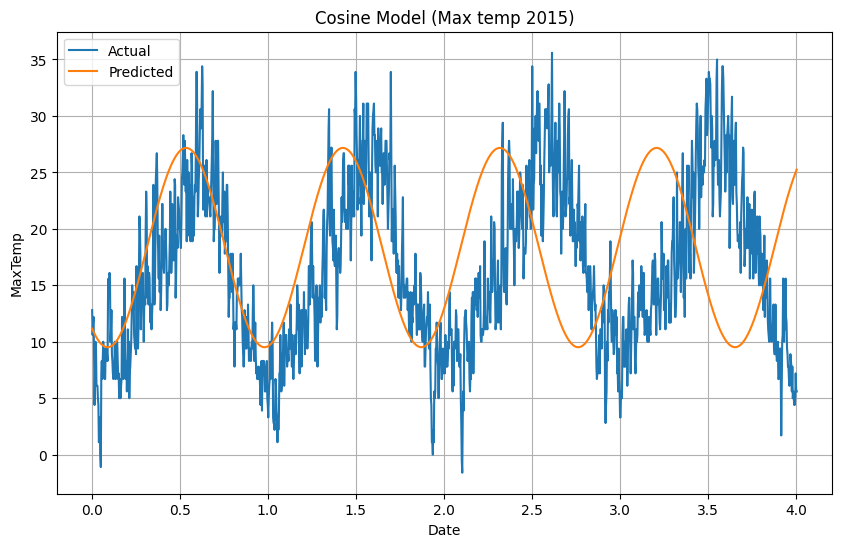

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_max'], label='Actual')
plt.plot(data['date_mod'], cos_model(data['date_mod'], *popt), label='Predicted')
plt.title('Cosine Model (Max temp 2015)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(data['temp_max'], cos_model(data['date_mod'], *popt)))
rmse

8.714719696231851

In [82]:
popt, _ = curve_fit(cos_model, data['date_mod'], data['temp_max'])

popt

array([16.31712832, -1.29012176,  0.67307713,  4.21250352])

In [83]:
c1, c2, c3, c4 = popt
data_max = cos_model(data['date_mod'], *popt)

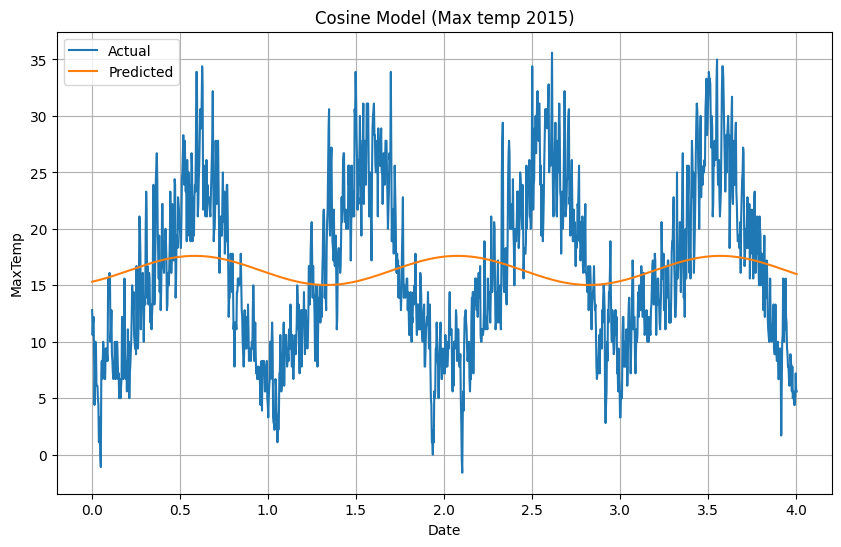

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(data['date_mod'], data['temp_max'], label='Actual')
plt.plot(data['date_mod'], data_max, label='Predicted')
plt.title('Cosine Model (Max temp 2015)')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend()
plt.grid(True)
plt.show()

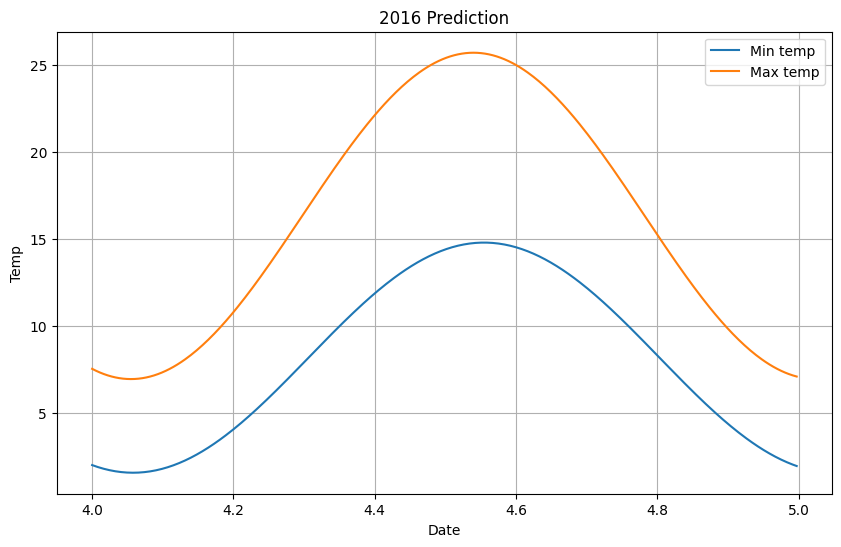

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(4, 5, 0.00274), y2_min, label='Min temp')
plt.plot(np.arange(4, 5, 0.00274), y2_max, label='Max temp')
plt.title('2016 Prediction')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.grid(True)
plt.show()